#Polynomial regression

In [1]:
#generating dataset
import numpy as np

np.random.seed(0)
x = np.random.rand(100,1)*10
y = 2*x**2 - 0.5*x + 5 + np.random.randn(100,1)*10


In [2]:
#creating polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [3]:
#splitting into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=100)

In [4]:
#regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :",mse)
print("R2 Score : ",r2)

MSE : 111.15632862966075
R2 Score :  0.9484220287274809


In [5]:
#K cross validation
from sklearn.model_selection import cross_val_score
mse_scores = -cross_val_score(model, x_poly, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, x_poly, y, cv=5, scoring='r2')

print("Average MSE in K cross validation :",mse_scores.mean())
print("Average R2 score in K cross validation :",r2_scores.mean())

Average MSE in K cross validation : 104.33746021763348
Average R2 score in K cross validation : 0.9636365931804299


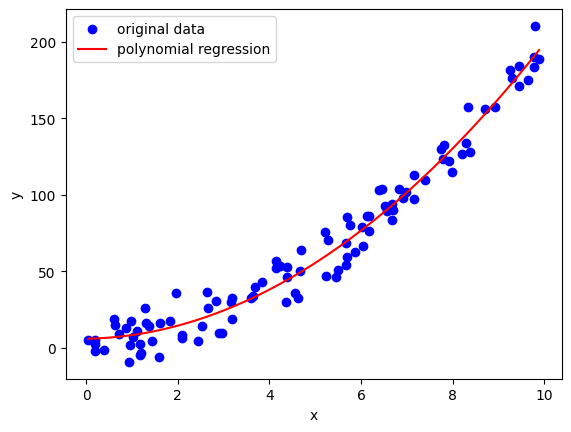

In [6]:
#visualization
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label = 'original data')
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
x_range_poly = poly.transform(x_range)
plt.plot(x_range , model.predict(x_range_poly), color='red', label = 'polynomial regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
